In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv(settings.DATA_PATH / 'world_bank' / 'API_4_DS2_en_csv_v2_3160069.csv', skiprows=4)
df = df.drop(columns=['Unnamed: 65'])

NameError: name 'settings' is not defined

In [ ]:
df.shape

(43092, 65)

In [ ]:
df['Country Name'].unique().size

266

In [ ]:
df['Indicator Code'].unique().size

162

In [ ]:
year_min = df.columns[4]
year_max = df.columns[-1]
print(f'The dataset holds data from the year {year_min} to the year {year_max}.')

The dataset holds data from the year 1960 to the year 2020.


One of the main challenges in this project will be the amount of missing data which we can observe in the following heatmap where the dark spots show the missing data.

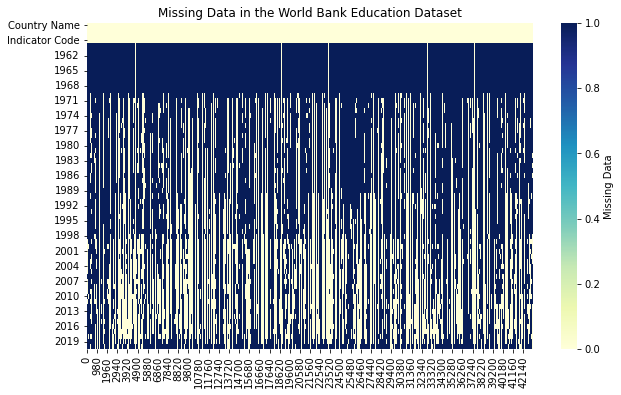

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().T,
            cmap='YlGnBu',
            cbar_kws={'label': 'Missing Data'}).set(title='Missing Data in the World Bank Education Dataset')
plt.show()

In [ ]:
columns_to_remove = ['Country Name', 'Country Code', 'Indicator Code'] + [str(year) for year in range(1960, 1991)]
d1 = df.drop(columns=columns_to_remove).notna()
d1['Indicator Name'] = df['Indicator Name']
d1 = d1.groupby(by='Indicator Name').mean()

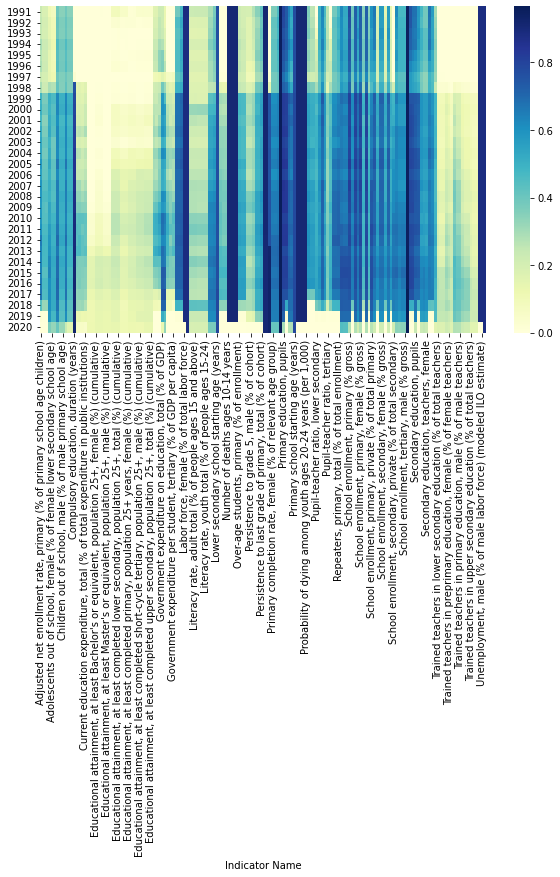

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(d1.T, cmap='YlGnBu')
plt.show()

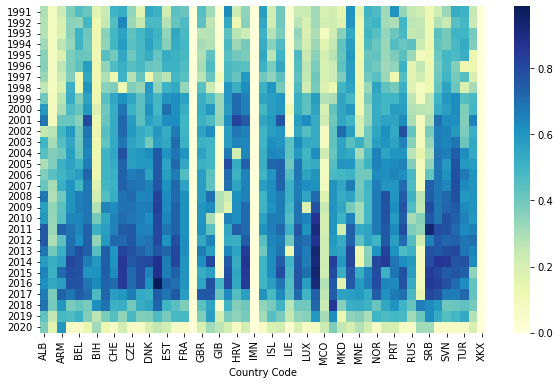

In [ ]:
columns_to_remove = ['Indicator Code', 'Indicator Name', 'Country Name'] + [str(year) for year in range(1960, 1991)]
d3 = df[df['Country Code'].isin(europe_codes)]
d3 = d3.drop(columns=columns_to_remove).notna()
d3['Country Code'] = df['Country Code']
d3 = d3.groupby(by='Country Code').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(d3.T, cmap='YlGnBu')
plt.show()

In [ ]:
d1 = df.drop(columns=columns_to_remove).notna()
d1['Indicator Name'] = df['Indicator Name']
d1 = d1.groupby(by='Indicator Name').mean()

columns_to_remove = ['Country Code', 'Indicator Name', 'Country Name'] + [str(year) for year in range(1960, 1991)]
d3 = df[df['Indicator Code'].isin(europe_codes)]
d3 = d3.drop(columns=columns_to_remove).notna()
d3['Indicator Code'] = df['Indicator Code']
d3 = d3.groupby(by='Country Code').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(d3.T, cmap='YlGnBu')
plt.show()

In [ ]:
columns_to_remove = ['Indicator Code', 'Indicator Name', 'Country Name'] + [str(year) for year in range(1960, 1991)]
d3 = df[df['Country Code'].isin(europe_codes)]
d3 = d3.drop(columns=columns_to_remove).notna()
d3

,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
810,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
811,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
812,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
813,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
814,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42439,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42440,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42441,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
42442,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from data import get_world_bank_data

df = get_world_bank_data()
df.head()

indicator_code     SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.FM.ZS  \
country_code year                                               
ABW          1960                   NaN                   NaN   
             1961                   NaN                   NaN   
             1962                   NaN                   NaN   
             1963                   NaN                   NaN   
             1964                   NaN                   NaN   

indicator_code     SE.ADT.1524.LT.MA.ZS  SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  \
country_code year                                                               
ABW          1960                   NaN                NaN                NaN   
             1961                   NaN                NaN                NaN   
             1962                   NaN                NaN                NaN   
             1963                   NaN                NaN                NaN   
             1964                   NaN                NaN                NaN   

indicator_code     SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  SE.COM.DURS  \
country_code year                                                   
ABW          1960                NaN             NaN          NaN   
             1961                NaN             NaN          NaN   
             1962                NaN             NaN          NaN   
             1963                NaN             NaN          NaN   
             1964                NaN             NaN          NaN   

indicator_code     SE.ENR.PRIM.FM.ZS  SE.ENR.PRSC.FM.ZS  ...  SH.DYN.1014  \
country_code year                                        ...                
ABW          1960                NaN                NaN  ...          NaN   
             1961                NaN                NaN  ...          NaN   
             1962                NaN                NaN  ...          NaN   
             1963                NaN                NaN  ...          NaN   
             1964                NaN                NaN  ...          NaN   

indicator_code     SH.DYN.1519  SH.DYN.2024  SL.TLF.TOTL.FE.ZS  \
country_code year                                                
ABW          1960          NaN          NaN                NaN   
             1961          NaN          NaN                NaN   
             1962          NaN          NaN                NaN   
             1963          NaN          NaN                NaN   
             1964          NaN          NaN                NaN   

indicator_code     SL.TLF.TOTL.IN  SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  \
country_code year                                                         
ABW          1960             NaN                NaN                NaN   
             1961             NaN                NaN                NaN   
             1962             NaN                NaN                NaN   
             1963             NaN                NaN                NaN   
             1964             NaN                NaN                NaN   

indicator_code     SL.UEM.TOTL.ZS  SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  
country_code year                                                        
ABW          1960             NaN          43.847190          53.669919  
             1961             NaN          43.358346          54.056784  
             1962             NaN          42.925745          54.383281  
             1963             NaN          42.488756          54.710292  
             1964             NaN          41.950133          55.119933  

[5 rows x 162 columns]

In [ ]:
df = df.reset_index().melt(id_vars=['country_code', 'indicator_code'], var_name='year').pivot(index=['country_code', 'year'], columns='indicator_code', values='value')
df.head()

indicator_code     SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.FM.ZS  \
country_code year                                               
ALB          1991                   NaN                   NaN   
             1992                   NaN                   NaN   
             1993                   NaN                   NaN   
             1994                   NaN                   NaN   
             1995                   NaN                   NaN   

indicator_code     SE.ADT.1524.LT.MA.ZS  SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  \
country_code year                                                               
ALB          1991                   NaN                NaN                NaN   
             1992                   NaN                NaN                NaN   
             1993                   NaN                NaN                NaN   
             1994                   NaN                NaN                NaN   
             1995                   NaN                NaN                NaN   

indicator_code     SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  SE.COM.DURS  \
country_code year                                                   
ALB          1991                NaN             NaN          NaN   
             1992                NaN             NaN          NaN   
             1993                NaN             NaN          NaN   
             1994                NaN             NaN          NaN   
             1995                NaN             NaN          NaN   

indicator_code     SE.ENR.PRIM.FM.ZS  SE.ENR.PRSC.FM.ZS  ...  SH.DYN.1014  \
country_code year                                        ...                
ALB          1991            1.00398            0.94971  ...          2.5   
             1992            1.01642            1.01280  ...          2.3   
             1993            1.03497            1.04385  ...          2.2   
             1994            0.98764            1.00526  ...          2.1   
             1995            0.96867            0.98171  ...          2.0   

indicator_code     SH.DYN.1519  SH.DYN.2024  SL.TLF.TOTL.FE.ZS  \
country_code year                                                
ALB          1991          3.4          5.1          43.185995   
             1992          3.6          5.5          44.044715   
             1993          3.7          5.7          44.384730   
             1994          3.7          5.9          44.709003   
             1995          3.8          6.0          44.702003   

indicator_code     SL.TLF.TOTL.IN  SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  \
country_code year                                                         
ALB          1991       1512840.0              15.60              16.69   
             1992       1513773.0              16.04              16.56   
             1993       1474435.0              16.64              16.42   
             1994       1438075.0              16.78              16.41   
             1995       1390620.0              16.79              16.39   

indicator_code     SL.UEM.TOTL.ZS  SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  
country_code year                                                        
ALB          1991           16.22          32.894240          61.456989  
             1992           16.33          32.940005          61.232496  
             1993           16.52          32.902771          61.071314  
             1994           16.57          32.822494          60.946907  
             1995           16.57          32.742209          60.825311  

[5 rows x 162 columns]

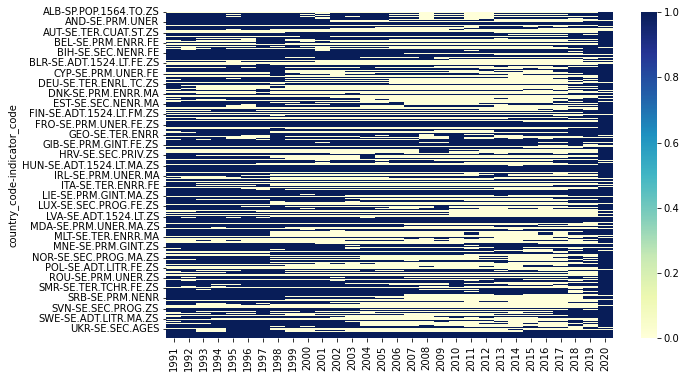

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='YlGnBu')
plt.show()

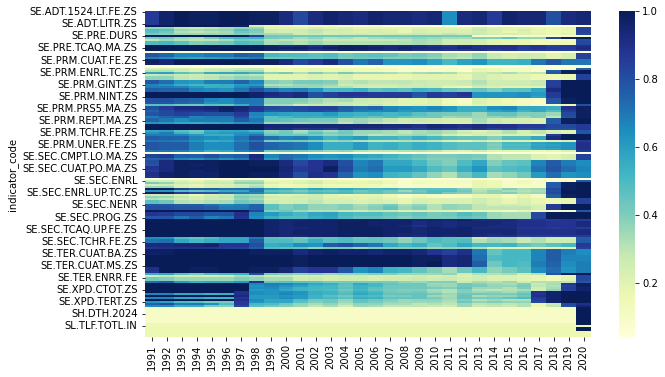

In [ ]:
df_indicator = df.isna().groupby(level='indicator_code').mean()
plt.figure(figsize=(10, 6))
sns.heatmap(df_indicator, cmap='YlGnBu')
plt.show()

In [ ]:
df_indicator = df.notna().groupby(level='indicator_code').mean()
most_present = df_indicator[df_indicator.mean(axis=1) > 0.5]
most_present.index.values

array(['SE.COM.DURS', 'SE.ENR.PRIM.FM.ZS', 'SE.ENR.PRSC.FM.ZS',
       'SE.ENR.SECO.FM.ZS', 'SE.ENR.TERT.FM.ZS', 'SE.PRE.DURS',
       'SE.PRE.ENRL.TC.ZS', 'SE.PRE.ENRR', 'SE.PRE.ENRR.FE',
       'SE.PRE.ENRR.MA', 'SE.PRM.AGES', 'SE.PRM.CMPT.FE.ZS',
       'SE.PRM.CMPT.MA.ZS', 'SE.PRM.CMPT.ZS', 'SE.PRM.DURS',
       'SE.PRM.ENRL', 'SE.PRM.ENRL.FE.ZS', 'SE.PRM.ENRL.TC.ZS',
       'SE.PRM.ENRR', 'SE.PRM.ENRR.FE', 'SE.PRM.ENRR.MA',
       'SE.PRM.GINT.FE.ZS', 'SE.PRM.GINT.MA.ZS', 'SE.PRM.GINT.ZS',
       'SE.PRM.NENR', 'SE.PRM.OENR.FE.ZS', 'SE.PRM.OENR.MA.ZS',
       'SE.PRM.OENR.ZS', 'SE.PRM.PRIV.ZS', 'SE.PRM.REPT.FE.ZS',
       'SE.PRM.REPT.MA.ZS', 'SE.PRM.REPT.ZS', 'SE.PRM.TCHR',
       'SE.PRM.TCHR.FE.ZS', 'SE.PRM.TENR', 'SE.PRM.UNER',
       'SE.PRM.UNER.ZS', 'SE.SEC.AGES', 'SE.SEC.DURS', 'SE.SEC.ENRL',
       'SE.SEC.ENRL.FE.ZS', 'SE.SEC.ENRL.GC', 'SE.SEC.ENRL.GC.FE.ZS',
       'SE.SEC.ENRL.VO', 'SE.SEC.ENRL.VO.FE.ZS', 'SE.SEC.ENRR',
       'SE.SEC.ENRR.FE', 'SE.SEC.ENRR.MA', 'SE.SE

In [ ]:
indicators = pd.read_csv(settings.DATA_PATH / 'world_bank' / 'Metadata_Indicator_API_4_DS2_en_csv_v2_3160069.csv')
indicators[indicators.INDICATOR_CODE.isin(most_present.index.values)].to_csv('test.csv')

In [ ]:
df = pd.read_excel(settings.DATA_PATH / 'world_bank' / 'hlo_database.xlsx', sheet_name='HLO Database')
df.head()

,code,country,year,subject,level,sourcetest,n_res,hlo,hlo_se,hlo_m,hlo_m_se,hlo_f,hlo_f_se,region,incomegroup
0,AFG,Afghanistan,2016,reading,pri,EGRA,1,315.45505,3.308458,320.97153,3.391902,307.07355,3.379419,South Asia,Low income
1,AGO,Angola,2011,reading,pri,EGRA,1,263.13571,3.331610,264.67056,3.118905,261.24457,3.413112,Sub-Saharan Africa,Lower middle income
2,ALB,Albania,2000,math,sec,PISA,1,410.24564,3.530675,401.86014,3.530971,417.89243,3.512387,Europe & Central Asia,Upper middle income
3,ALB,Albania,2000,reading,sec,PISA,1,348.84952,3.290668,319.07059,4.248581,377.55408,2.699219,Europe & Central Asia,Upper middle income
4,ALB,Albania,2000,science,sec,PISA,1,413.51315,2.843401,404.18893,2.694698,422.99924,2.729117,Europe & Central Asia,Upper middle income


In [ ]:
from data import get_hlo_data

df = get_hlo_data()
df.head()

,code,country,year,subject,level,sourcetest,n_res,hlo,hlo_se,hlo_m,hlo_m_se,hlo_f,hlo_f_se,region,incomegroup
0,AFG,Afghanistan,2016,reading,pri,EGRA,1,315.45505,3.308458,320.97153,3.391902,307.07355,3.379419,South Asia,Low income
1,AGO,Angola,2011,reading,pri,EGRA,1,263.13571,3.331610,264.67056,3.118905,261.24457,3.413112,Sub-Saharan Africa,Lower middle income
2,ALB,Albania,2000,math,sec,PISA,1,410.24564,3.530675,401.86014,3.530971,417.89243,3.512387,Europe & Central Asia,Upper middle income
3,ALB,Albania,2000,reading,sec,PISA,1,348.84952,3.290668,319.07059,4.248581,377.55408,2.699219,Europe & Central Asia,Upper middle income
4,ALB,Albania,2000,science,sec,PISA,1,413.51315,2.843401,404.18893,2.694698,422.99924,2.729117,Europe & Central Asia,Upper middle income


In [ ]:
df = df.drop(columns=['country', 'sourcetest', 'n_res', 'hlo_se', 'hlo_m_se', 'hlo_f_se', 'region', 'incomegroup'])
df.head()

,code,year,subject,level,hlo,hlo_m,hlo_f
0,AFG,2016,reading,pri,315.45505,320.97153,307.07355
1,AGO,2011,reading,pri,263.13571,264.67056,261.24457
2,ALB,2000,math,sec,410.24564,401.86014,417.89243
3,ALB,2000,reading,sec,348.84952,319.07059,377.55408
4,ALB,2000,science,sec,413.51315,404.18893,422.99924


In [ ]:
len(df.code.unique())

164

In [ ]:
min(df.year.unique())

2000

In [ ]:
max(df.year.unique())

2017

In [ ]:
df = df.rename(columns={'code': 'country_code'})

In [ ]:
df.shape

(2023, 7)

In [ ]:
from data import get_education_data

edu = get_education_data()
edu.shape

(16226, 162)

In [ ]:
edu.head()

indicator_code     SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.FM.ZS  \
country_code year                                               
ABW          1960                   NaN                   NaN   
             1961                   NaN                   NaN   
             1962                   NaN                   NaN   
             1963                   NaN                   NaN   
             1964                   NaN                   NaN   

indicator_code     SE.ADT.1524.LT.MA.ZS  SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  \
country_code year                                                               
ABW          1960                   NaN                NaN                NaN   
             1961                   NaN                NaN                NaN   
             1962                   NaN                NaN                NaN   
             1963                   NaN                NaN                NaN   
             1964                   NaN                NaN                NaN   

indicator_code     SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  SE.COM.DURS  \
country_code year                                                   
ABW          1960                NaN             NaN          NaN   
             1961                NaN             NaN          NaN   
             1962                NaN             NaN          NaN   
             1963                NaN             NaN          NaN   
             1964                NaN             NaN          NaN   

indicator_code     SE.ENR.PRIM.FM.ZS  SE.ENR.PRSC.FM.ZS  ...  SH.DYN.1014  \
country_code year                                        ...                
ABW          1960                NaN                NaN  ...          NaN   
             1961                NaN                NaN  ...          NaN   
             1962                NaN                NaN  ...          NaN   
             1963                NaN                NaN  ...          NaN   
             1964                NaN                NaN  ...          NaN   

indicator_code     SH.DYN.1519  SH.DYN.2024  SL.TLF.TOTL.FE.ZS  \
country_code year                                                
ABW          1960          NaN          NaN                NaN   
             1961          NaN          NaN                NaN   
             1962          NaN          NaN                NaN   
             1963          NaN          NaN                NaN   
             1964          NaN          NaN                NaN   

indicator_code     SL.TLF.TOTL.IN  SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  \
country_code year                                                         
ABW          1960             NaN                NaN                NaN   
             1961             NaN                NaN                NaN   
             1962             NaN                NaN                NaN   
             1963             NaN                NaN                NaN   
             1964             NaN                NaN                NaN   

indicator_code     SL.UEM.TOTL.ZS  SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  
country_code year                                                        
ABW          1960             NaN          43.847190          53.669919  
             1961             NaN          43.358346          54.056784  
             1962             NaN          42.925745          54.383281  
             1963             NaN          42.488756          54.710292  
             1964             NaN          41.950133          55.119933  

[5 rows x 162 columns]

In [ ]:
len(edu.reset_index().country_code.unique())

266

In [ ]:
len(edu.reset_index().year.unique())

61

In [ ]:
266 * 61

16226

In [ ]:
264 * 17

4488

In [ ]:
df.subject.unique()

array(['reading', 'math', 'science', 'average'], dtype=object)

In [ ]:
df.head()

,country_code,year,subject,level,hlo,hlo_m,hlo_f
0,AFG,2016,reading,pri,315.45505,320.97153,307.07355
1,AGO,2011,reading,pri,263.13571,264.67056,261.24457
2,ALB,2000,math,sec,410.24564,401.86014,417.89243
3,ALB,2000,reading,sec,348.84952,319.07059,377.55408
4,ALB,2000,science,sec,413.51315,404.18893,422.99924


In [ ]:
df = df.set_index(['country_code', 'year', 'subject', 'level'])

In [ ]:
df.groupby(['country_code', 'year']).mean()

hlo       hlo_m       hlo_f
country_code year                                    
AFG          2016  315.455050  320.971530  307.073550
AGO          2011  263.135710  264.670560  261.244570
ALB          2000  390.869437  375.039887  406.148583
             2009  405.799287  390.054260  422.369943
             2012  415.915333  412.478360  419.589937
...                       ...         ...         ...
ZMB          2007  300.744355  295.906690  305.330630
             2011  229.372570  231.196380  227.435940
             2013  335.791900         NaN         NaN
ZWE          2007  386.759600  388.862365  384.037705
             2013  389.554215         NaN         NaN

[755 rows x 3 columns]

In [14]:
from data import get_hlo_data, get_education_data

ed = get_education_data()
hlo = get_hlo_data()
ed.head()

indicator_code     SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.FM.ZS  \
country_code year                                               
ABW          1960                   NaN                   NaN   
             1961                   NaN                   NaN   
             1962                   NaN                   NaN   
             1963                   NaN                   NaN   
             1964                   NaN                   NaN   

indicator_code     SE.ADT.1524.LT.MA.ZS  SE.ADT.1524.LT.ZS  SE.ADT.LITR.FE.ZS  \
country_code year                                                               
ABW          1960                   NaN                NaN                NaN   
             1961                   NaN                NaN                NaN   
             1962                   NaN                NaN                NaN   
             1963                   NaN                NaN                NaN   
             1964                   NaN                NaN                NaN   

indicator_code     SE.ADT.LITR.MA.ZS  SE.ADT.LITR.ZS  SE.COM.DURS  \
country_code year                                                   
ABW          1960                NaN             NaN          NaN   
             1961                NaN             NaN          NaN   
             1962                NaN             NaN          NaN   
             1963                NaN             NaN          NaN   
             1964                NaN             NaN          NaN   

indicator_code     SE.ENR.PRIM.FM.ZS  SE.ENR.PRSC.FM.ZS  ...  SH.DYN.1014  \
country_code year                                        ...                
ABW          1960                NaN                NaN  ...          NaN   
             1961                NaN                NaN  ...          NaN   
             1962                NaN                NaN  ...          NaN   
             1963                NaN                NaN  ...          NaN   
             1964                NaN                NaN  ...          NaN   

indicator_code     SH.DYN.1519  SH.DYN.2024  SL.TLF.TOTL.FE.ZS  \
country_code year                                                
ABW          1960          NaN          NaN                NaN   
             1961          NaN          NaN                NaN   
             1962          NaN          NaN                NaN   
             1963          NaN          NaN                NaN   
             1964          NaN          NaN                NaN   

indicator_code     SL.TLF.TOTL.IN  SL.UEM.TOTL.FE.ZS  SL.UEM.TOTL.MA.ZS  \
country_code year                                                         
ABW          1960             NaN                NaN                NaN   
             1961             NaN                NaN                NaN   
             1962             NaN                NaN                NaN   
             1963             NaN                NaN                NaN   
             1964             NaN                NaN                NaN   

indicator_code     SL.UEM.TOTL.ZS  SP.POP.0014.TO.ZS  SP.POP.1564.TO.ZS  
country_code year                                                        
ABW          1960             NaN          43.847190          53.669919  
             1961             NaN          43.358346          54.056784  
             1962             NaN          42.925745          54.383281  
             1963             NaN          42.488756          54.710292  
             1964             NaN          41.950133          55.119933  

[5 rows x 162 columns]

In [3]:
hlo.head()

hlo       hlo_m       hlo_f
country_code year                                    
AFG          2016  315.455050  320.971530  307.073550
AGO          2011  263.135710  264.670560  261.244570
ALB          2000  390.869437  375.039887  406.148583
             2009  405.799287  390.054260  422.369943
             2012  415.915333  412.478360  419.589937

In [2]:
ed.index

MultiIndex([('ABW', 1960),
            ('ABW', 1961),
            ('ABW', 1962),
            ('ABW', 1963),
            ('ABW', 1964),
            ('ABW', 1965),
            ('ABW', 1966),
            ('ABW', 1967),
            ('ABW', 1968),
            ('ABW', 1969),
            ...
            ('ZWE', 2011),
            ('ZWE', 2012),
            ('ZWE', 2013),
            ('ZWE', 2014),
            ('ZWE', 2015),
            ('ZWE', 2016),
            ('ZWE', 2017),
            ('ZWE', 2018),
            ('ZWE', 2019),
            ('ZWE', 2020)],
           names=['country_code', 'year'], length=16226)

In [15]:
df = ed.join(hlo)
df = df.sort_index(axis=1, level='year')
df.head()
df.to_csv('test.csv')

In [16]:
df.fillna(method='ffill', axis=0).to_csv('test.csv')

In [18]:
df.groupby('country_code').ffill().to_csv('test.csv')

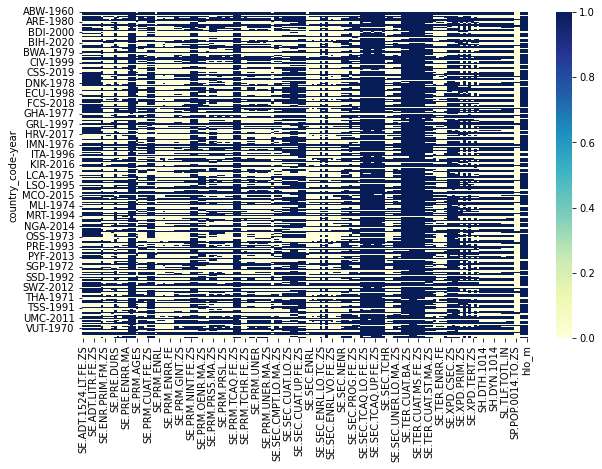

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.groupby('country_code').ffill().isna(), cmap='YlGnBu')
plt.show()

In [9]:
df = df.fillna(method='ffill', axis=1)
df.head()
df.to_csv('test.csv')

In [2]:
from data import merged_data
df = merged_data()
df.head()

SE.ADT.1524.LT.FE.ZS  SE.ADT.1524.LT.FM.ZS  ...  hlo_f  hlo_m
country_code year                                              ...              
ABW          2001             99.166367               1.00287  ...    NaN    NaN
             2002             99.166367               1.00287  ...    NaN    NaN
             2003             99.166367               1.00287  ...    NaN    NaN
             2004             99.166367               1.00287  ...    NaN    NaN
             2005             99.166367               1.00287  ...    NaN    NaN

[5 rows x 165 columns]

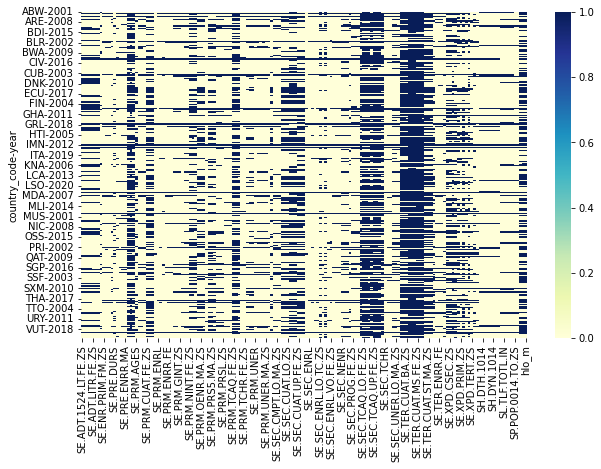

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='YlGnBu')
plt.show()